<a href="https://colab.research.google.com/github/abrehamgezahegn/ml-notebooks/blob/master/ANN_for_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as  plt
from sklearn.model_selection import train_test_split
tf.__version__

'2.4.1'

## Load data

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)

In [ ]:
x_train.shape

(60000, 28, 28)

## Preprocess 


In [ ]:
x_train = x_train  / 255
x_test = x_test  / 255

In [ ]:
x_train[0:1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

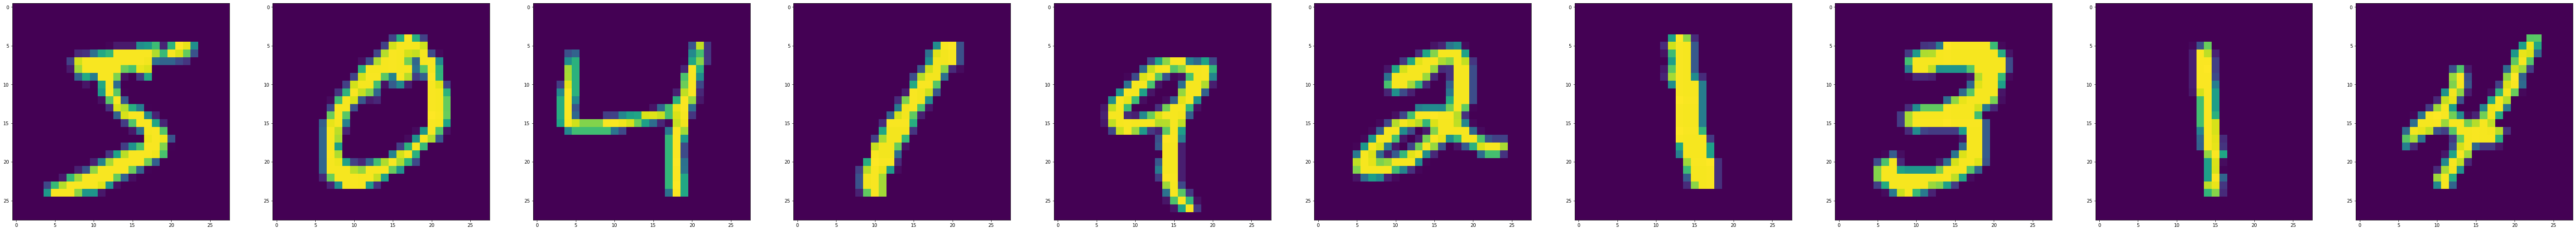

In [ ]:

fig,ax = plt.subplots(1,10, figsize=(100 ,30))
for (i, image) in enumerate(x_train[0:10]):
  ax[i].imshow(image)

fig.show()

In [ ]:
help(tf.keras.layers.Flatten)

Help on class Flatten in module tensorflow.python.keras.layers.core:

class Flatten(tensorflow.python.keras.engine.base_layer.Layer)
 |  Flatten(*args, **kwargs)
 |  
 |  Flattens the input. Does not affect the batch size.
 |  
 |  Note: If inputs are shaped `(batch,)` without a feature axis, then
 |  flattening adds an extra channel dimension and output shape is `(batch, 1)`.
 |  
 |  Arguments:
 |    data_format: A string,
 |      one of `channels_last` (default) or `channels_first`.
 |      The ordering of the dimensions in the inputs.
 |      `channels_last` corresponds to inputs with shape
 |      `(batch, ..., channels)` while `channels_first` corresponds to
 |      inputs with shape `(batch, channels, ...)`.
 |      It defaults to the `image_data_format` value found in your
 |      Keras config file at `~/.keras/keras.json`.
 |      If you never set it, then it will be "channels_last".
 |  
 |  Example:
 |  
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers

## build model


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.2))
# model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10 , activation="softmax"))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10);

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4783 - accuracy: 0.8599 - val_loss: 0.1351 - val_accuracy: 0.9605
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1563 - accuracy: 0.9538 - val_loss: 0.1015 - val_accuracy: 0.9693
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1107 - accuracy: 0.9656 - val_loss: 0.0802 - val_accuracy: 0.9750
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0919 - accuracy: 0.9720 - val_loss: 0.0735 - val_accuracy: 0.9781
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0757 - accuracy: 0.9757 - val_loss: 0.0758 - val_accuracy: 0.9767
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0623 - accuracy: 0.9796 - val_loss: 0.0715 - val_accuracy: 0.9781
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0578 - accuracy: 0.9814 - val_loss: 0.0724 - val_accuracy:

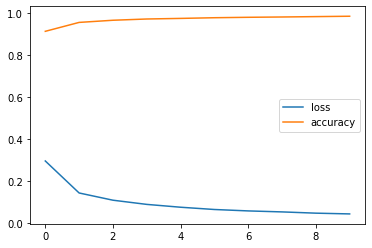

In [ ]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["accuracy"] ,label="accuracy")
plt.legend()

In [ ]:
model.evaluate(x_train , y_train)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0187 - accuracy: 0.9945


[0.018736165016889572, 0.9945499897003174]

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()




# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

Confusion matrix, without normalization
[[ 970    0    1    2    0    2    1    1    2    1]
 [   0 1126    2    1    0    0    2    0    4    0]
 [   1    2 1012    1    1    0    1   10    4    0]
 [   0    0    3  983    0    9    0    6    5    4]
 [   1    0    2    1  947    0    5    3    1   22]
 [   2    0    0    4    0  881    0    1    3    1]
 [   4    2    0    1    1    6  941    0    3    0]
 [   0    3    7    2    0    1    0 1006    3    6]
 [   3    0    2    2    4    8    0    2  950    3]
 [   0    4    0    2    5    3    1    4    2  988]]


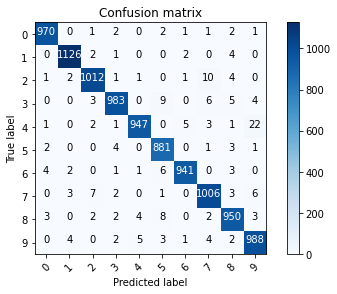

In [ ]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
cm
plot_confusion_matrix(cm, list(range(10)))


(10000,)
(196,)


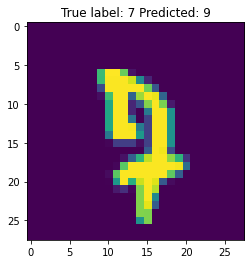

In [ ]:
import numpy as np
misclassified_idx = np.where(p_test != y_test)[0]
print(p_test.shape)
print(misclassified_idx.shape)

# fig,ax  = plt.subplots(10 ,10, figsize=(100, 100))

# for i in range(0,10):
#   for j in range(0, 10):
#       ax[i,j].imshow(x_test[j])
#       # ax[i,j].title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));
# fig.show()

i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i])
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

In [ ]:
a = np.random.randint(1,20,15).reshape(3,5)
print(a)
np.stack(a, -1)

[[18 18 18 18  5]
 [ 1 17  3 11 10]
 [ 8  4 16 15  9]]


array([[18,  1,  8],
       [18, 17,  4],
       [18,  3, 16],
       [18, 11, 15],
       [ 5, 10,  9]])